### OBJECTIVES
## ‎ 
#### 1) How is prediction task defined? And what is the meaning of the output variable?
#### 2) How do you represent your data as features?
#### 3) Did you process the features in any way?
#### 4) How did you select which learning algorithms to use?
#### 5) Did you try to hypertune the parameters of the learning algorithm, and in that case how?
#### 6) How do you evaluate the quality of your system?
#### 7) How does your system compare to a stupid baseline?
#### 8) Can you say anything about the errors that the system makes?
#### 9) Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)

# ‎ 

## CLASSIFICATION: Factory Dataset

#### How is the prediction task defined? And what is the meaning of the output variable?
#### ‎ 
##### The prediction task here is to predict which machine will possibly fail before it does, so that it can be replaced and does not interrupt production

In [1]:
## import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

## import sklearn tools for building and scoring the model
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

## import Classifiers from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [2]:
## read in 'factory_data (classification).csv' dataset to dataframe
df = pd.read_csv('factory_data (classification).csv')
df

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0
...,...,...,...,...,...,...,...,...,...
19995,19996,T87335,M,25.75,35.35,NaN,29.5,14,0
19996,19997,Z59525,H,25.85,35.35,1632.0,31.8,17,0
19997,19998,T83921,M,25.95,NaN,NaN,33.4,22,0
19998,19999,K42424,H,25.95,35.65,1408.0,48.5,25,0


#### How do you represent your data as features ?
#### Did you process the features in any way?
### ‎ 
##### In this dataset, all but one of the columns that will be used in the classification task are numerical attributes, excluding the 'Quality' column, consisting of CHAR(1) values. The columns 'Unique ID' and 'Product ID' has been dropped, as they are not useful when conducting statistical inference in our classification task of predicting whether a machine might fail or not.
##### ‎ 
##### The data has been split into data array X and target array y, with X containing all columns excluding 'Machine Status', while y contains only the target variable, 'Machine Status'
##### ‎ 
##### In the data preprocessing stage, multiple steps have been taken to prepare the data for Classification. 
##### Upon checking for null values, it is found that there are multiple null values in  'Quality', 'Process T (C)' and 'Rotation Speed (rpm)' columns

In [21]:
## set feature array X and target array y
X = df.drop(['Machine Status', 'Unique ID', 'Product ID'], axis=1)
y = df['Machine Status']

,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min)
0,M,24.95,35.45,1551.0,42.8,0
1,L,25.05,35.55,1408.0,46.3,3
2,L,24.95,35.35,1498.0,49.4,5
3,L,25.05,35.45,1433.0,39.5,7
4,L,25.05,35.55,1408.0,40.0,9
...,...,...,...,...,...,...
19995,M,25.75,35.35,NaN,29.5,14
19996,H,25.85,35.35,1632.0,31.8,17
19997,M,25.95,NaN,NaN,33.4,22
19998,H,25.95,35.65,1408.0,48.5,25


In [4]:
# check if there are any null values in the dataframe
print("\nIf value below = True, there are null values")
print(df.isnull().values.any())

# check total number of null values in the dataframe
print("\nTotal number of null values")
print(df.isnull().sum().sum())

# use a for loop to iterate through columns in dataframe to identify columns with missing values
print("\nColumns with missing values:")
for i in range(0, len(df.columns)):
    column = df.iloc[:,i]
    colName = df.keys()[i]
    print(colName + ": " + str(df[colName].isnull().sum()))


If value below = True, there are null values
True

Total number of null values
2579

Columns with missing values:
Unique ID: 0
Product ID: 0
Quality: 991
Ambient T (C): 0
Process T (C): 400
Rotation Speed (rpm): 1188
Torque (Nm): 0
Tool Wear (min): 0
Machine Status: 0


#### By plotting histograms of the numerical attributes containing null values, we are able to identify what form of imputation is best fitted to fill these null values.
##### ‎ 
#### As shown below, 'Process T (C)' is normally distributed and centered in the middle while 'Rotation Speed (rpm)' is positively skewed to the left. Hence, they have been imputed using the mean and median respectively. As for quality, since it is a categorical attribute, it has been imputed using the most frequent value.

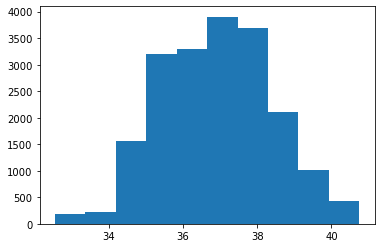

In [5]:
proc_T = plt.hist(df['Process T (C)'])

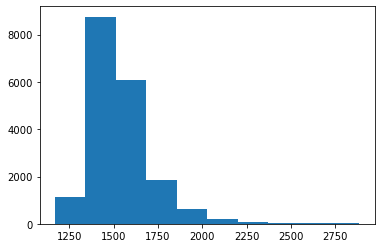

In [6]:
rpm = plt.hist(df['Rotation Speed (rpm)'])

Number of 0: 19322
Number of 1: 678


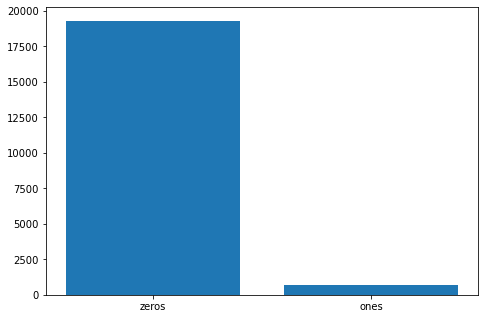

In [7]:
status = df['Machine Status']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

zero = status[status == 0]
one = status[status == 1]

print('Number of 0: ' + str(len(zero)))
print('Number of 1: ' + str(len(one)))

x_values = [len(zero), len(one)]
x_labels = ['zeros', 'ones']

ax.bar(x_labels, x_values)
plt.show()

#### From the bar graph showing the counts of zeros and ones in the 'Machine Status' column above, we can tell that the data is unbalanced, and hence accuracy is not a good gauge when evaluating our model. When data is unbalanced, it is common practice to evaluate the model based on f1 score instead of looking solely at accuracy.

#### Upon imputation of null values, the data is then split into X_train, X_test, y_train and y_test to be prepared for classification

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
print(X_train)

      Quality  Ambient T (C)  Process T (C)  Rotation Speed (rpm)  \
17218       H          26.85          36.75                1400.0   
15188       L          30.95          40.15                1632.0   
11295       L          25.65          36.75                1402.0   
19772       L          25.45          36.45                   NaN   
13072       L          27.05          35.95                1314.0   
...       ...            ...            ...                   ...   
11284       L          25.35          36.45                2153.0   
11964       M          24.75          34.45                1405.0   
5390        H          29.65          39.15                1483.0   
860         H          22.95          33.75                1541.0   
15795       M          28.85          38.35                1465.0   

       Torque (Nm)  Tool Wear (min)  
17218         48.7              119  
15188         30.6              121  
11295         54.3              128  
19772         34.8 

### How did you select which learning algorithms to use?
##### ‎ 
##### To first select which learning algorithms to use, the problem domain is first identified. As this is a classification task, the following learning algorithms were selected: K-Nearest-Neighbors, Naive Bayes, Logistic Regression, Decision Tree, Random Forest and SVC.
##### ‎ 
##### K-Nearest-Neighbors is a simple, straightforward classifier and effective despite being slow
##### ‎ 
##### Naive Bayes is a simple probalitistic classifier that does not require much data, and consistently shows great performance regardless of size of data
##### ‎ 
##### Logistic Regression is one of the default models considered when performing a classification task, and provides many ways to regularize the model
##### ‎ 
##### Decision Tree and Random Forest classifiers work better with high quality, clean data which this dataset posseses. These classifiers are non-parametric, and hence there is no need to worry abour outliers or linear seperatability
##### ‎ 
##### SVC classifiers have a high accuracy and theoretical guarantees regardless of overfitting, although computationally intensive and hard to tune due to many hyperparameters
# ‎ 

### Handling Imputation Of NULL Values + Fitting The Models Into Pipeline

In [28]:
## in order to handle imputation of null values of multiple attributes with varying datatypes, ColumnTransformer is used

## first transformation to impute missing values across the columns using different methods
trf1 = ColumnTransformer([
    ('impute_quality', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), [0]),
    ('impute_proc_T', SimpleImputer(missing_values=np.nan, strategy='mean'), [2]),
    ('impute_rpm', SimpleImputer(missing_values=np.nan, strategy='median'), [3])
], remainder='passthrough')

## second transformation to encode column 'Quality' using OrdinalEncoder() as it is a non-numeric attribute
trf2 = ColumnTransformer([
    ('encode', OrdinalEncoder(), [0])
], remainder='passthrough')

## create array containing list of names of classifiers
model_name = ['KNeighborsClassifier', 'GaussianNB', 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC']
## create array containing list of classifier objects
models = [KNeighborsClassifier(), GaussianNB(), LogisticRegression(), DecisionTreeClassifier(random_state = 42), RandomForestClassifier(), SVC()]
scores_df = pd.DataFrame()

## using a for loop, fit the models into the pipeline 
for i in range(len(models)):
    pipeline = Pipeline([('trf1', trf1), ('trf2', trf2), ('StandardScaler', StandardScaler()),('models', models[i])])

    pipeline.fit(X_train, y_train)
    y_hat = pipeline.predict(X_test)
    scores_df = scores_df.append({'Model': model_name[i],
                              'F1_score': metrics.f1_score(y_test, y_hat, average='weighted'),
                              'Precision': metrics.precision_score(y_test, y_hat, average='weighted'),
                              'Recall': metrics.recall_score(y_test, y_hat, average='weighted'),
                              'Accuracy': metrics.accuracy_score(y_test, y_hat)},
                            ignore_index=True)
    
print(scores_df)

                    Model  F1_score  Precision    Recall  Accuracy
0    KNeighborsClassifier  0.970931   0.971967  0.975167  0.975167
1              GaussianNB  0.952460   0.948689  0.957333  0.957333
2      LogisticRegression  0.961031   0.964652  0.969833  0.969833
3  DecisionTreeClassifier  0.990554   0.990616  0.990500  0.990500
4  RandomForestClassifier  0.989358   0.989457  0.989833  0.989833
5                     SVC  0.966247   0.971586  0.973333  0.973333


##### Although all models possess high results in all the metrics, it is important to note that the data is highly imbalanced, and there is a high chance that the models are overfitted. Hence, cross validation should be performed on the models to reduce overfitting.

### Cross Validation With cross_val_score

In [11]:
scorings = ['accuracy', 'f1', 'precision', 'recall']
cv_scores = []

for i in range(len(models)):
    pipeline = Pipeline([('trf1', trf1), ('trf2', trf2), ('StandardScaler', StandardScaler()),('models', models[i])])

    pipeline.fit(X_train, y_train)
    
    for a in range(len(scorings)):
        scores = cross_val_score(pipeline, X, y, cv=5, scoring=scorings[a])
        cv_scores.append(scores.mean())

    
# print(scores_df)
cv_scores = np.array(cv_scores)
cv_scores = np.split(cv_scores, 6)
cv_scores = np.array(cv_scores)
cvDF = pd.DataFrame(cv_scores, columns=['accuracy', 'f1', 'precision', 'recall'])
cvDF.insert(0, "model", ['KNeighborsClassifier', 'GaussianNB', 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC'], True)
cvDF

,model,accuracy,f1,precision,recall
0,KNeighborsClassifier,0.97880,0.592585,0.857465,0.454281
1,GaussianNB,0.95850,0.241318,0.350225,0.190283
2,LogisticRegression,0.96895,0.257867,0.759083,0.165272
3,DecisionTreeClassifier,0.99170,0.878644,0.875017,0.883497
4,RandomForestClassifier,0.99415,0.900716,0.976703,0.848105
5,SVC,0.97485,0.441436,0.892107,0.293519


##### Upon performing cross validation, it is seen that the accuracies of all models have gone up. However, f1 score, precision and recall scores have dropped significantly for most models.

##### As Random Forest, Decision Tree and K-Nearest-Neighbors performed the best out of the rest of the models, they have been chosen. As random forest is just a more complex variation of decision tree, decision tree will not be used. Later on, hyperparameter tuning will be conducted on both kNN and Random Forest classifiers.

### System Errors

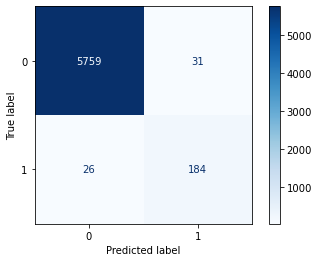

In [27]:
## System Errors

model = DecisionTreeClassifier(random_state=42)
pipeline = Pipeline([('trf1', trf1), ('trf2', trf2), ('StandardScaler', StandardScaler()),('models', model)])
pipeline.fit(X_train, y_train)
scores = cross_val_score(pipeline, X, y, cv=5)

y_hat = pipeline.predict(X_test)

plot_confusion_matrix(estimator=pipeline, X=X_test, y_true=y_test, cmap='Blues')

#### By plotting a confusion matrix, we are able to visualise what kind of errors our system makes.
##### ‎
##### As shown in the confusion matrix, the model classifies 5759 of positives correctly and 1844 of the negatives correctly. It classifies 31 negatives as positive, and 26 negatives as positives.
##### ‎
##### This result is quite satisfactory, as the total number of Type I and Type II errors combined are only 57, which is 0.95% of the total values in the test data. 

### Check For Overfitting

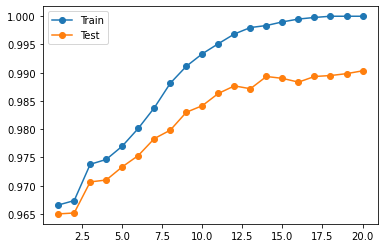

In [13]:
## overfitting in RandomForestClassifier()

train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:
    model = RandomForestClassifier(max_depth=i)
    pipeline = Pipeline([('trf1', trf1), ('trf2', trf2), ('StandardScaler', StandardScaler()),('model', model)])
    pipeline.fit(X_train, y_train)
    
    test_y_hat = pipeline.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_y_hat)
    test_scores.append(test_acc)
    
    train_y_hat = pipeline.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_y_hat)
    train_scores.append(train_acc)

pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

##### As the train and test lines are increasing correspondingly before the test line slowly starts to stagnate while the train accuracy continues to increase, there is a weak overfitting of the model observed.

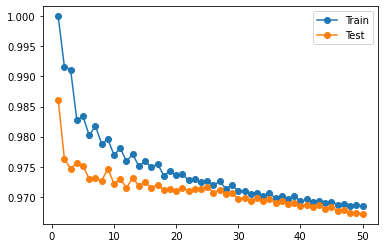

In [14]:
## overfitting in KNeighborsClassifier()

train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]

for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    pipeline = Pipeline([('trf1', trf1), ('trf2', trf2), ('StandardScaler', StandardScaler()),('model', model)])
    pipeline.fit(X_train, y_train)
    
    test_y_hat = pipeline.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_y_hat)
    test_scores.append(test_acc)
    
    train_y_hat = pipeline.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_y_hat)
    train_scores.append(train_acc)

pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

##### Although it looks as though the train and test lines are slowly converging as number of neighbors increases, they never fully converge. However, it is noteworthy to remember that the K-Nearest-Neighbors model is simply the training dataset stored in an efficient data structure. Hence, skill for the model on the training dataset should not be anything less than 100%.

### Hyperparameter Tuning with GridSearchCV

In [16]:
## GridSearchCV() on RandomForestClassifier()
pipeline = Pipeline([('trf1', trf1), ('trf2', trf2), ('StandardScaler', StandardScaler()), ('lr', RandomForestClassifier())])

parameters = {'lr__n_estimators': (100, 200, 500),
              'lr__criterion': ('gini', 'entropy', 'log_loss'),
              'lr__max_depth': (np.arange(10, 101, 20)),
              'lr__max_features': ('auto', 'sqrt', 'log2')}
                                                                                           
grid = GridSearchCV(pipeline, parameters, cv=5, scoring='f1', n_jobs = -1)
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)

0.9187938633721437
{'lr__criterion': 'entropy', 'lr__max_depth': 30, 'lr__max_features': 'log2', 'lr__n_estimators': 500}


In [17]:
## GridSearchCV on KNeighborsClassifier()
pipeline = Pipeline([('trf1', trf1), ('trf2', trf2), ('StandardScaler', StandardScaler()), ('lr', KNeighborsClassifier())])

k_range = list(range(1,31))
parameters = {'lr__n_neighbors': k_range,
              'lr__weights': ('uniform', 'distance'),
              'lr__metric': ('minkowski', 'chebyshev'),
              'lr__algorithm': ('ball_tree', 'kd_tree', 'brute')}


grid = GridSearchCV(pipeline, parameters, cv=5, scoring='f1', n_jobs = -1)
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)

0.9192734329976625
{'lr__algorithm': 'ball_tree', 'lr__metric': 'minkowski', 'lr__n_neighbors': 3, 'lr__weights': 'distance'}
Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_quality',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('impute_proc_T',
                                                  SimpleImputer(), [2]),
                                                 ('impute_rpm',
                                                  SimpleImputer(strategy='median'),
                                                  [3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode', OrdinalEncoder(),
                                                  [0])])),
     

### How well does your system compare to a stupid baseline?
##### ‎ 
##### Below the DummyClassifier() classifier is used, so that we are able to compare the system to a stupid baseline like such. The dummy classifier makes predictions that ignore the input features, and is typically used as a baseline to compare with other models to evaluate their performance

### Dummy Classifier

Accuracy: 0.9661
Accuracy Std: 0.00020000000000002237
F1 Score: 0.0
F1 Score Std: 0.0


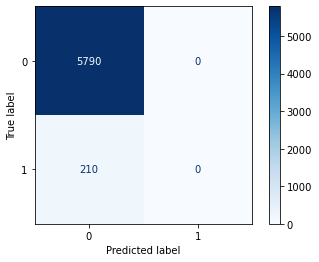

In [19]:
dc = DummyClassifier(random_state = 42)

pipeline = Pipeline([('trf1', trf1), ('trf2', trf2), ('StandardScaler', StandardScaler()),('model', dc)])

pipeline.fit(X_train, y_train)
accuracy = cross_val_score(dc, X, y, cv=10, scoring='accuracy')
f1 = cross_val_score(dc, X, y, cv=10, scoring='f1')

print('Accuracy: ' + str(accuracy.mean()))
print('Accuracy Std: ' + str(accuracy.std()))
print('F1 Score: ' + str(f1.mean()))
print('F1 Score Std: ' + str(f1.std()))


plot_confusion_matrix(estimator=dc, X=X_test, y_true=y_test, cmap='Blues')

##### Although the Dummy Classifier has a very high accuracy, it has an f1 score of 0. This is expected as the dummy classifier uses the most frequent values in the dataset, hence resulting in an extremely high accuracy due to the lack of balance in the data.

### Feature Importance

Feature: 0, Score: 0.02382
Feature: 1, Score: 0.12142
Feature: 2, Score: 0.21485
Feature: 3, Score: 0.13452
Feature: 4, Score: 0.34381
Feature: 5, Score: 0.16158


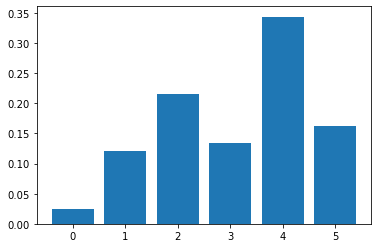

In [22]:
# define the model
model = RandomForestClassifier(random_state=42)
# fit the model
pipeline = Pipeline([('trf1', trf1), ('trf2', trf2), ('StandardScaler', StandardScaler()),('RFC', model)])
pipeline.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### In order to identify the importance of each feature, Random Forest Classifier is used, and the coefficient values of each feature are then returned.

##### Using these coefficients as importance value, a bar chart of feature importance on the y-axis is plotted against the feature number on the x-axis. It is seen that feature 4, holds a very large importance in this classification task.

##### The fourth feature in this case, represents Torque (Nm), which is the measure of turning force of the system.

### References
##### https://www.analyticssteps.com/blogs/types-classifiers-machine-learning
##### https://www.researchgate.net/post/How_to_choose_appropriate_classifier
##### http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.165.6726&rep=rep1&type=pdf
##### https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623
##### https://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/
##### https://nlp.stanford.edu/IR-book/html/htmledition/choosing-what-kind-of-classifier-to-use-1.html
##### https://towardsai.net/p/data-science/dealing-with-class-imbalance%E2%80%8A-%E2%80%8A-dummy-classifiers

##### https://towardsdatascience.com/why-using-a-dummy-classifier-is-a-smart-move-4a55080e3549
##### https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
##### https://machinelearningmastery.com/calculate-feature-importance-with-python/